In [1]:
# notebooks/01_introduccion_y_contexto.ipynb

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import os
import sys
import time

# Añade la carpeta src al path para poder importar utils.py
src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.append(src_path)

from utils import *

## GYMNASIUM BLACKJACK

In [2]:
# Crear el entorno
env = gym.make("Blackjack-v1", natural=False, sab=False)

In [3]:
# Explorar el espacio de observación y acción
print("Espacio de observación:", env.observation_space)
print("Espacio de acción:", env.action_space)

Espacio de observación: Tuple(Discrete(32), Discrete(11), Discrete(2))
Espacio de acción: Discrete(2)


**Espacio de observación: Tuple(Discrete(32), Discrete(11), Discrete(2))**
- Discrete(32): Representa la suma de las cartas del jugador (entre 0 y 31)
- Discrete(11): Representa el valor de la carta visible del dealer (entre 1 y 10, donde 1 es el As)
- Discrete(2): Indica si el jugador tiene un As útil (0 = no, 1 = sí)

**Espacio de acción: Discrete(2)**
- 0: Quedarse (stick) - No pedir más cartas
- 1: Pedir carta (hit) - Solicitar una carta adicional

=== ESTADO INICIAL ===
  Tupla: (12, 6, 0)
  - Suma jugador: 12
  - Carta visible dealer: 6
  - As útil: 0

Objetivo: acercarte a 21 sin pasarte.
Dealer se planta en 17+ y pide carta por debajo.



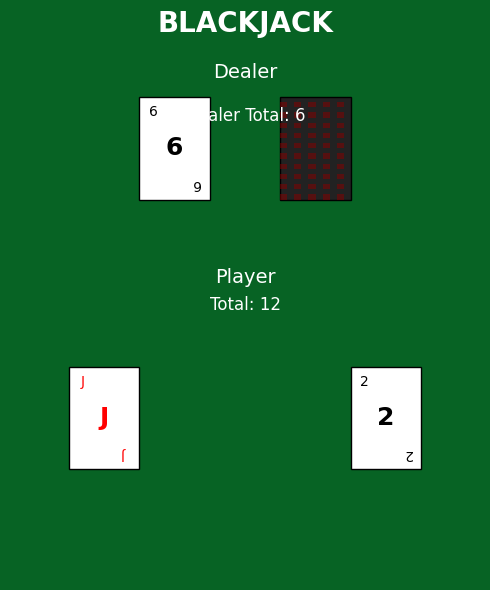

In [4]:
# — Iniciar episodio —
obs, info = env.reset()
done = False
prev = obs

print("=== ESTADO INICIAL ===")
print(f"  Tupla: {obs}")
print(f"  - Suma jugador: {obs[0]}")
print(f"  - Carta visible dealer: {obs[1]}")
print(f"  - As útil: {obs[2]}")
print(
    "\nObjetivo: acercarte a 21 sin pasarte.\n"
    "Dealer se planta en 17+ y pide carta por debajo.\n"
)

# Mostrar estado inicial
fig = visualize_blackjack_step(prev)
plt.show()

In [5]:
reset_globals()  # ¡Nuevo! Reinicia símbolos 10/J/Q/K para cada partida
# — Un solo paso —
action = env.action_space.sample()
name = "Pedir carta" if action else "Quedarse"
print(f"\n--- Acción: {name} ({action}) ---")

new_obs, reward, terminated, truncated, info = env.step(action)
print(f"  Nuevo estado: {new_obs}")
print(f"  Recompensa: {reward}")
print(f"  Terminado: {terminated}")
print(f"  Truncado: {truncated}")

# Solo revelar cartas del dealer si NO es un bust del jugador
player_bust = new_obs[0] > 21  # Determinar si el jugador se pasó
dealer_hand = env.unwrapped.dealer if (terminated or truncated) else None


--- Acción: Pedir carta (1) ---
  Nuevo estado: (22, 6, 0)
  Recompensa: -1.0
  Terminado: True
  Truncado: False


In [6]:
# Dibujar con posible mano del dealer
fig = visualize_blackjack_step(prev, new_obs, action, dealer_cards=dealer_hand)
plt.show()

print("\n=== RESULTADO DEL PASO ===")
print(f"  Nuevo estado: {new_obs}")
print(f"  Recompensa: {reward}")

# Mensajes según reward*
if reward == 1:
    print("▶ GANASTE: tu suma es mayor que la del dealer o éste se pasó.")
elif reward == -1:
    if new_obs[0] > 21:
        print("▶ PERDISTE: te pasaste de 21.")
    else:
        print("▶ PERDISTE: la suma del dealer es mayor.")
else:  # reward==0
    print("▶ EMPATE: tu suma y la del dealer coinciden.")


=== RESULTADO DEL PASO ===
  Nuevo estado: (22, 6, 0)
  Recompensa: -1.0
▶ PERDISTE: te pasaste de 21.



=== EPISODIO 1 ===

--- Estado Inicial ---


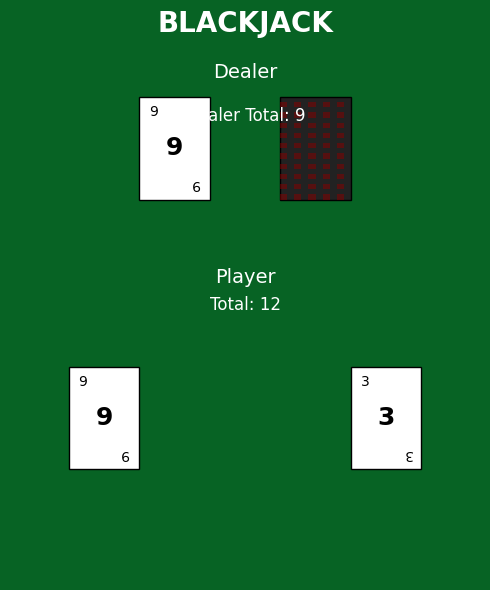


Acción: Quedarse


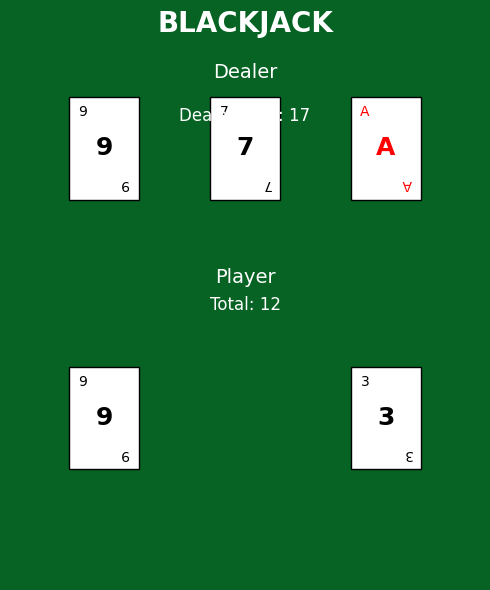

Resultado Final: -1.0
Cartas del dealer: [9, 7, 1]

=== EPISODIO 2 ===

--- Estado Inicial ---


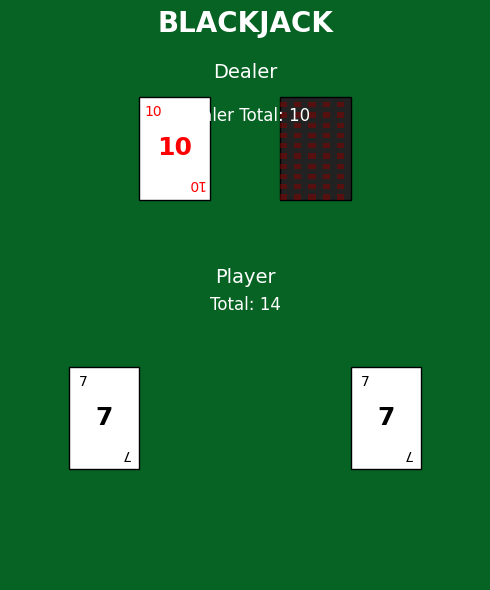


Acción: Pedir carta

Acción: Quedarse


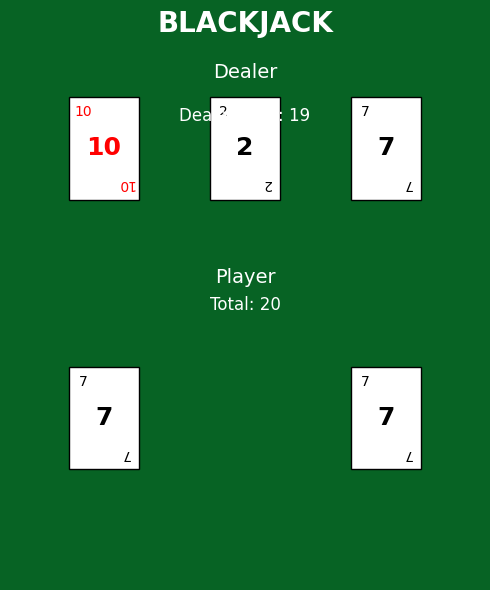

Resultado Final: 1.0
Cartas del dealer: [10, 2, 7]

=== EPISODIO 3 ===

--- Estado Inicial ---


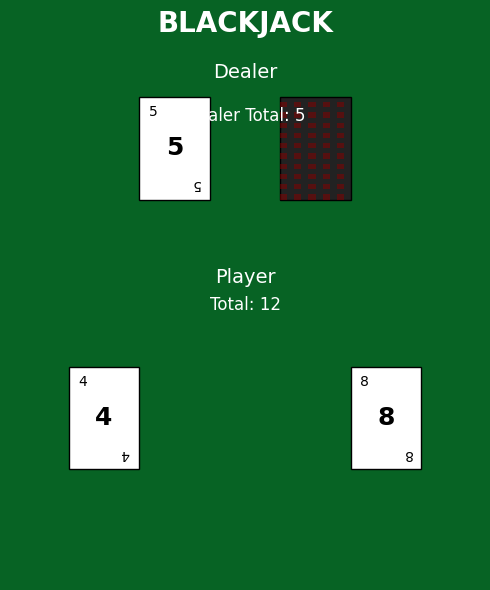


Acción: Pedir carta

Acción: Pedir carta
Resultado Final: -1.0
Cartas del dealer: [5, 10]

=== EPISODIO 4 ===

--- Estado Inicial ---


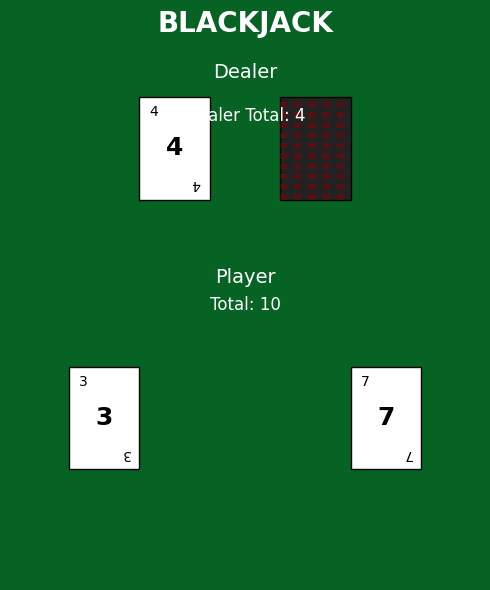


Acción: Pedir carta

Acción: Quedarse


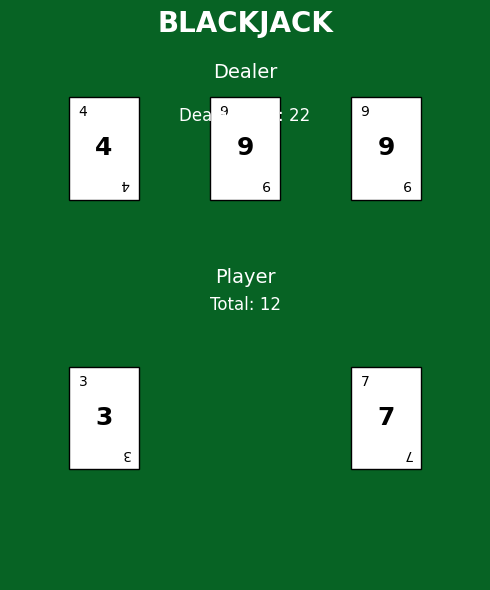

Resultado Final: 1.0
Cartas del dealer: [4, 9, 9]

=== EPISODIO 5 ===

--- Estado Inicial ---


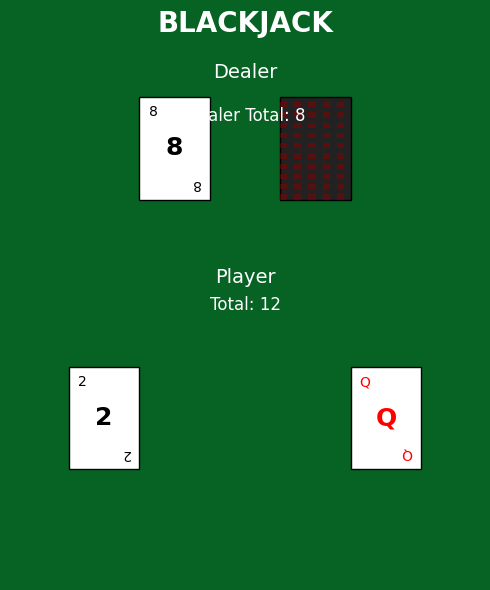


Acción: Pedir carta
Resultado Final: -1.0
Cartas del dealer: [8, 4]


In [7]:
# notebooks/01_introduccion_y_contexto.ipynb

# Configuración inicial
env = gym.make("Blackjack-v1", natural=False, sab=False)
num_episodes = 5

for episode in range(num_episodes):
    print(f"\n=== EPISODIO {episode + 1} ===")
    reset_globals()  # Reinicio crítico aquí
    obs, info = env.reset()
    done = False
    
    # Estado inicial
    print("\n--- Estado Inicial ---")
    fig = visualize_blackjack_step(obs)
    plt.show()
    
    while not done:
        action = env.action_space.sample()
        new_obs, reward, done, truncated, info = env.step(action)
        
        # Mostrar transición
        print(f"\nAcción: {'Pedir carta' if action else 'Quedarse'}")
        dealer_hand = env.unwrapped.dealer if (done or truncated) else None
        fig = visualize_blackjack_step(obs, new_obs, action, dealer_cards=dealer_hand)
        plt.show()
        
        # Actualizar estado
        obs = new_obs
        
        if done:
            print(f"Resultado Final: {reward}")
            print("Cartas del dealer:", dealer_hand)